# №9
**Определить устойчивость** системы с передаточной функцией в *разомкнутом* сотоянии
$$W(s) = \frac{k}{(1+T_1s)(1+T_2s)(1+T_3s)}$$
при $T_1 = 0.5~c,~T_2 = 0.0025~c,~T_3 = 0.0025~c,~k = 500~\frac{1}{c}$. Что произойдет с утойчивостью системы после введения *последовательного* корректирующего звена 
$$W_k = \frac{1 + T_4s}{1 + T_5s},~T_4 = 0.1~c,~T_5 = 0.4~c$$

In [1]:
import numpy, matplotlib.pyplot # Подключаем модули расширенной работы с математикой и построения графиков

In [2]:
T1 = 0.5; T2 = 0.0025; T3 = 0.0025; k = 500;

I вариант. Воспользуемся готовыми средствами (модуль control для Python):

In [3]:
import control

W = control.tf([k], [T1*T2*T3,  T1*T2 + T1*T3 + T2*T3,  T1 + T2 + T3,  1]) # Определим передаточную функцию

print(W)


                    500
------------------------------------------
3.125e-06 s^3 + 0.002506 s^2 + 0.505 s + 1



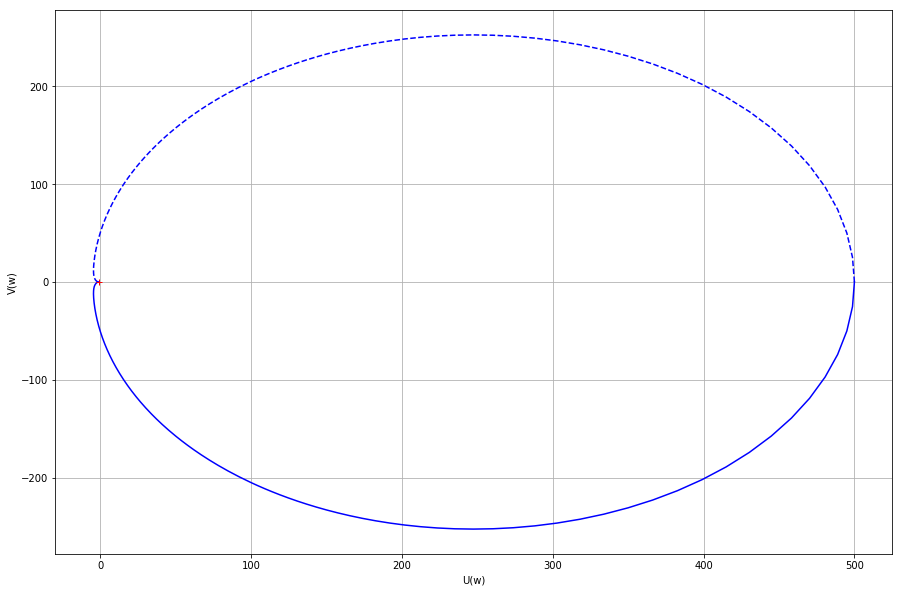

In [4]:
matplotlib.pyplot.figure(figsize=(15, 10)) # размеры графика
control.nyquist(W, omega=numpy.arange(0, 500, 0.1)) # Построим годограф Найквиста системы
matplotlib.pyplot.grid(True) # сетка
matplotlib.pyplot.axis('tight') # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #
matplotlib.pyplot.show()

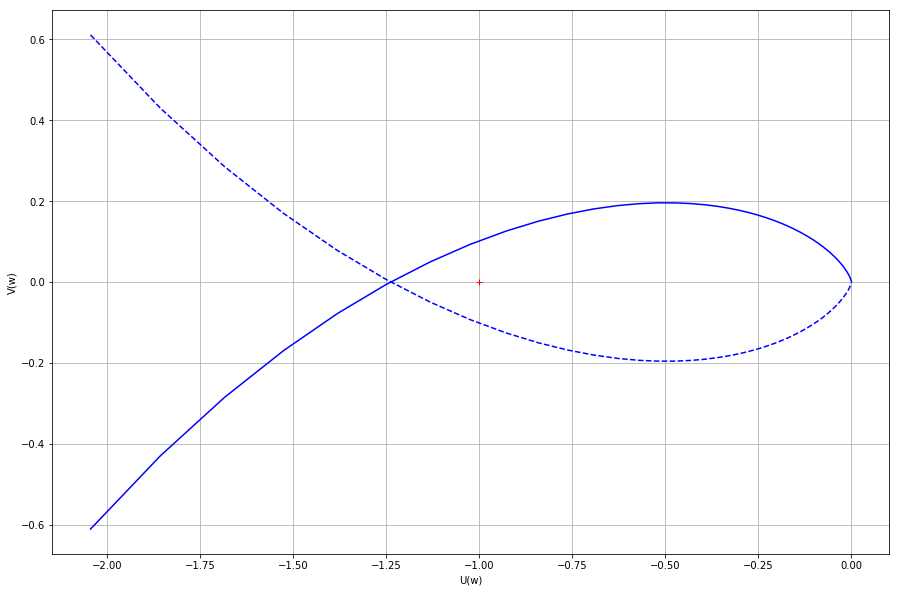

In [5]:
matplotlib.pyplot.figure(figsize=(15, 10)) # размеры графика
control.nyquist(W, omega=numpy.arange(300, 5000, 20)) # Построим годограф Найквиста системы
matplotlib.pyplot.grid(True) # сетка
matplotlib.pyplot.axis('tight') # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #
matplotlib.pyplot.show()

II вариант. Построим годограф Найквиста, воспользовавшись только средствами Python.

In [6]:
def W(s):                                             # Определим передаточную функцию
    return k/((1 + T1*s)*(1 + T2*s)*(1 + T3*s))       #

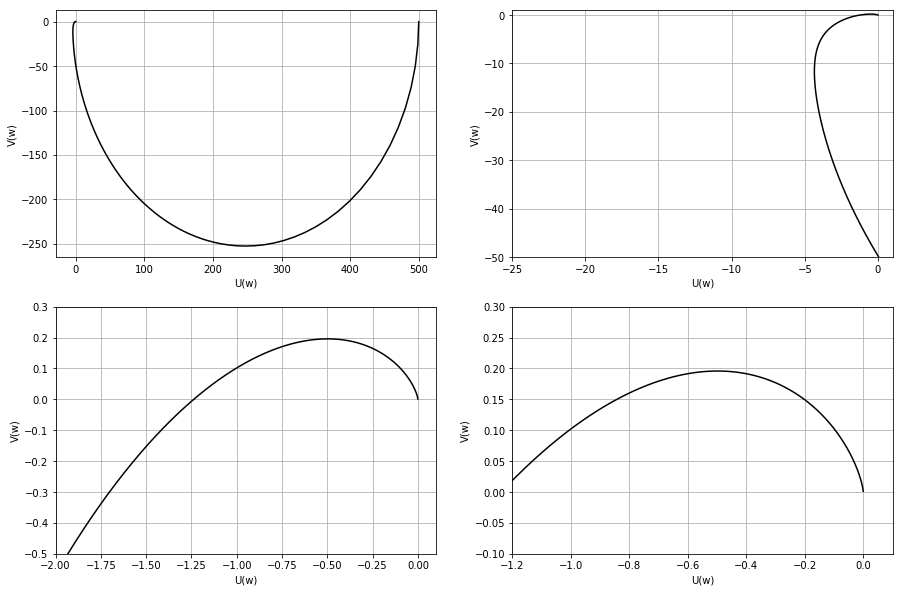

In [7]:
a = numpy.array([W(1j*omega) for omega in numpy.arange(0, 5000, 0.1)])

matplotlib.pyplot.figure(figsize=(15, 10))

matplotlib.pyplot.subplot(221) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)   # сетка
matplotlib.pyplot.axis('tight') # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.subplot(222) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)   # сетка
matplotlib.pyplot.axis([-25, 1, -50, 1]) # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.subplot(223) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)   # сетка
matplotlib.pyplot.axis([-2, 0.1, -0.5, 0.3]) # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.subplot(224) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True) # сетка
matplotlib.pyplot.axis([-1.2, 0.1, -0.1, 0.3]) # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.show()

По критерию Найквиста, система **неустойчива.** Введем последовательное корректирующее звено (в рамках II варианта решения задачи)

**Замечание.** При последовательном соединении звеньев их передаточные функции перемножаются.

In [8]:
T4 = 0.1; T5 = 0.4;

def correctingW(s):              # Передаточная функция корректирующего звена
    return (1 + T4*s)/(1 + T5*s) #

def correctedW(s):               # Передаточная функция разомкнутого состояния скорректированной системы
    return W(s)*correctingW(s)   #

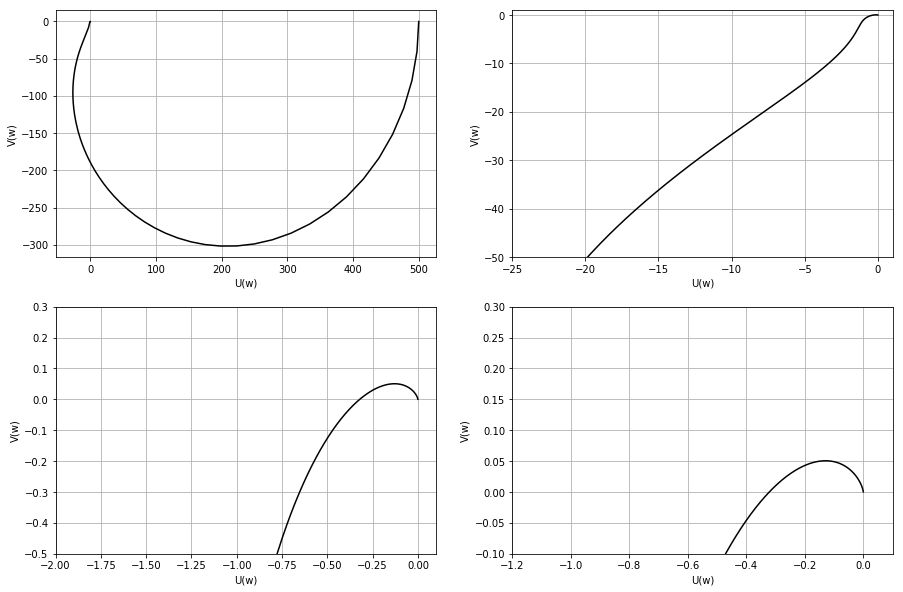

In [9]:
a = numpy.array([correctedW(1j*omega) for omega in numpy.arange(0, 5000, 0.1)])

matplotlib.pyplot.figure(figsize=(15, 10))

matplotlib.pyplot.subplot(221) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)   # сетка
matplotlib.pyplot.axis('tight') # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.subplot(222) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)   # сетка
matplotlib.pyplot.axis([-25, 1, -50, 1]) # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.subplot(223) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)   # сетка
matplotlib.pyplot.axis([-2, 0.1, -0.5, 0.3]) # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.subplot(224) # подграфик
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True) # сетка
matplotlib.pyplot.axis([-1.2, 0.1, -0.1, 0.3]) # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.show()

По критерию Найквиста, видно, что теперь система стала **устойчивой.**